In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
# import seaborn as sns

In [19]:
# read in 2019 data set, clean it up, and narrow it down to the specific rows of interest

data2019_df = pd.read_csv("DataFiles/2019.csv")
data2019_df.fillna(value='', axis=None, inplace=True, limit=None, downcast=None)
data2019_df.head(15)

skinny_data2019 = data2019_df.loc[[0,1,3,4,63],:].reset_index()
skinny_data2019 = skinny_data2019.drop(['index'],axis=1)
skinny_datab2019 = skinny_data2019.drop(['Total Employed (thou) 2019', '% Men 2019','% White 2019'], axis=1)
skinny_datab2019


,Occupation,% Women 2019,% Black 2019,% Asian 2019,% Latinx 2019
0,"Total, 16 years and over",47.0,12.3,6.5,17.6
1,"Management, professional, and related occupations",51.8,9.6,8.7,10.1
2,Management occupations,40,7.8,6.1,10.7
3,Chief executives,27.6,4.1,5.8,6.2
4,Professional and related occupations,57.4,10.5,10,9.9


In [20]:
# Read in 2010 data set (which we cleaned up in csv file at same time as we converted it from its original txt format) 
#and narrow to relevant rows

data2010_df = pd.read_csv("DataFiles/2010.csv")
data2010_df.fillna(value='', axis=None, inplace=True, limit=None, downcast=None)
data2010_df.head(12)

skinny_data2010 = data2010_df.loc[[0,1,3,4,58],:].reset_index()
skinny_data2010


,index,Occupation,Total Employed (thou) 2010,% Men 2010,% Women 2010,% White 2010,% Black 2010,% Asian 2010,% Latinx 2010
0,0,"Total, 16 years and over.........................","139,064",52.8,47.2,,10.8,4.8,14.3
1,1,"Management, professional, and related occupati...","51,743",48.5,51.5,,8.4,6.1,7.3
2,3,Management occupations...........................,"15,001",61.8,38.2,,6.4,4.4,7.6
3,4,Chief executives.................................,"1,505",74.5,25.5,,2.8,3.2,4.8
4,58,Professional and related occupations.............,"30,805",42.6,57.4,,9.2,7,7.1


In [21]:
# Repeat for years 2011-2018
data2011_df = pd.read_csv("DataFiles/2011.csv")
data2011_df.fillna(value='', axis=None, inplace=True, limit=None, downcast=None)
skinny_data2011 = data2011_df.loc[[0,1,3,4,63],:].reset_index()
skinny_data2011

data2012_df = pd.read_csv("DataFiles/2012.csv")
data2012_df.fillna(value='', axis=None, inplace=True, limit=None, downcast=None)
skinny_data2012 = data2012_df.loc[[0,1,3,4,63],:].reset_index()
skinny_data2012

data2013_df = pd.read_csv("DataFiles/2013.csv")
data2013_df.fillna(value='', axis=None, inplace=True, limit=None, downcast=None)
skinny_data2013 = data2013_df.loc[[0,1,3,4,63],:].reset_index()
skinny_data2013

data2014_df = pd.read_csv("DataFiles/2014.csv")
data2014_df.fillna(value='', axis=None, inplace=True, limit=None, downcast=None)
skinny_data2014 = data2014_df.loc[[0,1,3,4,63],:].reset_index()
skinny_data2014

data2015_df = pd.read_csv("DataFiles/2015.csv")
data2015_df.fillna(value='', axis=None, inplace=True, limit=None, downcast=None)
skinny_data2015 = data2015_df.loc[[0,1,3,4,63],:].reset_index()
skinny_data2015

data2016_df = pd.read_csv("DataFiles/2016.csv")
data2016_df.fillna(value='', axis=None, inplace=True, limit=None, downcast=None)
skinny_data2016 = data2016_df.loc[[0,1,3,4,63],:].reset_index()
skinny_data2016

data2017_df = pd.read_csv("DataFiles/2017.csv")
data2017_df.fillna(value='', axis=None, inplace=True, limit=None, downcast=None)
skinny_data2017 = data2017_df.loc[[0,1,3,4,63],:].reset_index()
skinny_data2017

data2018_df = pd.read_csv("DataFiles/2018.csv")
data2018_df.fillna(value='', axis=None, inplace=True, limit=None, downcast=None)
skinny_data2018 = data2018_df.loc[[0,1,3,4,63],:].reset_index()
skinny_data2018


,index,Occupation,Total Employed (thou) 2018,% Men 2018,% Women 2018,% White 2018,% Black 2018,% Asian 2018,% Latinx 2018
0,0,"Total, 16 years and over","155,761",53.1,46.9,78.0,12.3,6.3,17.3
1,1,"Management, professional, and related occupations","62,436",48.5,51.5,79.4,9.6,8.5,9.7
2,3,Management occupations,"18,263",60.0,40.0,83.9,7.6,5.9,10.3
3,4,Chief executives,"1,573",73.1,26.9,89.5,3.5,5.9,6.1
4,63,Professional and related occupations,"36,586",43.2,56.8,77.2,10.5,9.6,9.6


In [22]:
#Combine data for all ten years into one dataframe

all_skinnies = [skinny_data2010,skinny_data2011,skinny_data2012,skinny_data2013,skinny_data2014,skinny_data2015,skinny_data2016,skinny_data2017,skinny_data2018,skinny_data2019]
combined = pd.concat(all_skinnies, join='outer', axis=1).drop(['index'],axis=1)

# Swap columns and rows to make it easier to read and clean up index and column labels
combined_swap=combined.swapaxes("index","columns")
combined_swap = combined_swap.reset_index()
nan = float("NaN")
combined_swap.replace("", nan, inplace=True)
combined_swap.dropna(axis = 0, how ='any',inplace=True)
combined_swap = combined_swap.reset_index().drop(['level_0'], axis = 1).rename(columns={
    'index':'Demographic',
    0:'Total, 16 years and over',
    1:'Management & Professional Occupations',
    2:'Management Occupations',
    3:'Chief Executives',
    4:'Professional Occupations'})

combined_dfs = combined_swap.drop([combined_swap.index[0],combined_swap.index[7],combined_swap.index[14],combined_swap.index[21],combined_swap.index[28],combined_swap.index[35],combined_swap.index[42],combined_swap.index[49],combined_swap.index[57],combined_swap.index[65]])

# Write to a csv file so can view the whole thing outside of the notebook
combined_dfs.to_csv('DataFiles/Combined_dfs.csv',float_format='%.1f') 

combined_dfs



,Demographic,"Total, 16 years and over",Management & Professional Occupations,Management Occupations,Chief Executives,Professional Occupations
1,Total Employed (thou) 2010,"139,064","51,743","15,001","1,505","30,805"
2,% Men 2010,52.8,48.5,61.8,74.5,42.6
3,% Women 2010,47.2,51.5,38.2,25.5,57.4
4,% Black 2010,10.8,8.4,6.4,2.8,9.2
5,% Asian 2010,4.8,6.1,4.4,3.2,7
...,...,...,...,...,...,...
68,% Women 2019,47.0,51.8,40,27.6,57.4
69,% White 2019,77.7,79,83.6,88.8,76.7
70,% Black 2019,12.3,9.6,7.8,4.1,10.5
71,% Asian 2019,6.5,8.7,6.1,5.8,10


In [23]:
#To permit calculations, convert values to floats, first removing commas from strings representing numbers
combined_dfs['Total, 16 years and over']=combined_dfs['Total, 16 years and over'].str.replace(',','')
combined_dfs['Management & Professional Occupations']=combined_dfs['Management & Professional Occupations'].str.replace(',','')
combined_dfs['Management Occupations']=combined_dfs['Management Occupations'].str.replace(',','')
combined_dfs['Chief Executives']=combined_dfs['Chief Executives'].str.replace(',','')
combined_dfs['Professional Occupations']=combined_dfs['Professional Occupations'].str.replace(',','')

combined_dfs['Total, 16 years and over']=combined_dfs['Total, 16 years and over'].apply(pd.to_numeric,downcast='float', errors='ignore')
combined_dfs['Management & Professional Occupations']=combined_dfs['Management & Professional Occupations'].apply(pd.to_numeric,downcast='float', errors='ignore')
combined_dfs['Management Occupations']=combined_dfs['Management Occupations'].apply(pd.to_numeric,downcast='float', errors='ignore')
combined_dfs['Chief Executives']=combined_dfs['Chief Executives'].apply(pd.to_numeric,downcast='float', errors='ignore')
combined_dfs['Professional Occupations']=combined_dfs['Professional Occupations'].apply(pd.to_numeric,downcast='float', errors='ignore')

type(combined_dfs.iloc[2,1])

numpy.float64

In [24]:
#Make data frames for each demographic group to make calling them into equations easier
men_df = combined_dfs.loc[combined_dfs['Demographic'].str.contains('Men')]
women_df = combined_dfs.loc[combined_dfs['Demographic'].str.contains('Women')]
white_df = combined_dfs.loc[combined_dfs['Demographic'].str.contains('White')]
black_df = combined_dfs.loc[combined_dfs['Demographic'].str.contains('Black')]
asian_df = combined_dfs.loc[combined_dfs['Demographic'].str.contains('Asian')]
latinx_df = combined_dfs.loc[combined_dfs['Demographic'].str.contains('Latinx')]

In [25]:
women_df = women_df.reset_index()
women_df.head(10)

,index,Demographic,"Total, 16 years and over",Management & Professional Occupations,Management Occupations,Chief Executives,Professional Occupations
0,3,% Women 2010,47.200001,51.500000,38.200001,25.500000,57.400002
1,10,% Women 2011,46.900002,51.400002,38.099998,24.200001,57.099998
2,17,% Women 2012,47.000000,51.500000,38.599998,27.400000,57.200001
3,24,% Women 2013,47.000000,51.400002,38.200001,26.799999,57.099998
4,31,% Women 2014,46.900002,51.599998,38.599998,26.299999,57.200001
5,38,% Women 2015,46.799999,51.500000,39.200001,27.900000,57.200001
6,45,% Women 2016,46.799999,51.500000,39.099998,27.299999,57.000000
7,52,% Women 2017,46.900002,51.599998,39.799999,28.000000,57.000000
8,60,% Women 2018,46.900002,51.500000,40.000000,26.900000,56.799999
9,68,% Women 2019,47.000000,51.799999,40.000000,27.600000,57.400002


In [26]:
# Calculate linear regression data for women, men, black, asian, latinx, whites. Include rsquared values 
# (For whites, use only years 2017-2019)

#WOMEN IN WORKFORCE
x_values = np.array([2010, 2011,2012,2013,2014,2015,2016,2017,2018,2019])
toty_values = women_df['Total, 16 years and over']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, toty_values)                                                
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
wom_tot2030 = round((slope*2030+intercept),1)

print('For Women in Total Workforce')
print(f"slope: {slope}, intercept: {intercept}, rvalue: {rvalue}")
print(f"Line equation: {line_eq}")
print(f"Rsquared value: {rvalue**2}")
print(f"Predicted women's share of the workforce in 2030: {wom_tot2030}")

# # WOMEN CEOS

ceoy_values = women_df['Chief Executives']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, ceoy_values)                                                
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
wom_ceos2030 = round((slope*2030+intercept),1)
print('For Women CEOs')
print(f"slope: {slope}, intercept: {intercept}, rvalue: {rvalue}")
print(f"Line equation: {line_eq}")
print(f"Rsquared value: {rvalue**2}")
print(f"Predicted share of Chief Executive jobs held by women in 2030: {wom_ceos2030}")


# # WOMEN MGRS

mgry_values = women_df['Management Occupations']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, mgry_values)                                                
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
wom_mgrs2030 = round((slope*2030+intercept),1)
print('For Managerial Women')
print(f"slope: {slope}, intercept: {intercept}, rvalue: {rvalue}")
print(f"Line equation: {line_eq}")
print(f"Rsquared value: {rvalue**2}")
print(f"Predicted share of managerial jobs held by women in 2030: {wom_mgrs2030}")


# # WOMEN PROF

profy_values = women_df['Professional Occupations']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, profy_values)                                                
line_eq = "y = " + str(round(slope,2)) + "x + " + str((intercept,2))
wom_prof2030 = round((slope*2030+intercept),1)
                                               
print('For Professional Women:')
print(f"slope: {slope}, intercept: {intercept}, rvalue: {rvalue}")
print(f"Line equation: {line_eq}")
print(f"Rsquared value: {rvalue**2}")
print(f"Predicted share of professional jobs held by women in 2030: {wom_prof2030}")


For Women in Total Workforce
slope: -0.01818184130119555, intercept: 83.56731983531606, rvalue: -0.46897901112210333
Line equation: y = -0.02x + 83.57
Rsquared value: 0.21994131287306593
Predicted women's share of the workforce in 2030: 46.7
For Women CEOs
slope: 0.26606059218897965, intercept: -509.1890631935814, rvalue: 0.6805613598087247
Line equation: y = 0.27x + -509.19
Rsquared value: 0.4631637644647004
Predicted share of Chief Executive jobs held by women in 2030: 30.9
For Managerial Women
slope: 0.23515153364701705, intercept: -434.73276498967954, rvalue: 0.9461500636768004
Line equation: y = 0.24x + -434.73
Rsquared value: 0.8951999429956136
Predicted share of managerial jobs held by women in 2030: 42.6
For Professional Women:
slope: -0.02060602361505682, intercept: 98.65083472511985, rvalue: -0.33945522744457857
Line equation: y = -0.02x + (98.65083472511985, 2)
Rsquared value: 0.11522985143945057
Predicted share of professional jobs held by women in 2030: 56.8


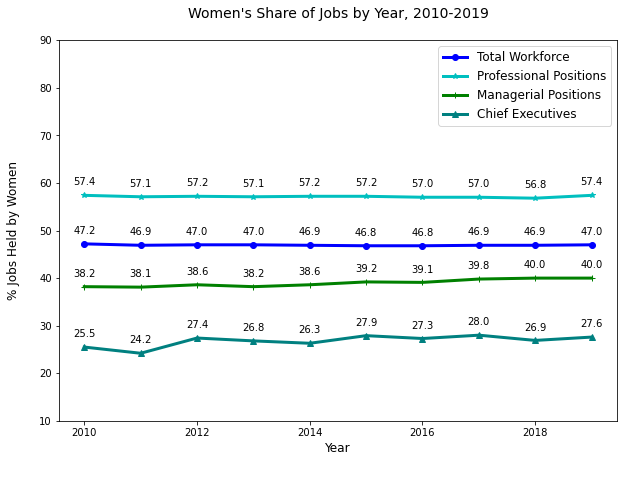

In [27]:
x_axis = x_values
plt.figure(figsize=(10,7))

plt.plot(x_axis, toty_values, marker = "o", color="b",linewidth=3,label="Total Workforce")
for x,y in zip(x_axis,toty_values):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')
    
plt.plot(x_axis,profy_values, marker = "*", color="c", linewidth=3,label = "Professional Positions")
for x,y in zip(x_axis,profy_values):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')

plt.plot(x_axis,mgry_values, marker = "+", color="g", linewidth=3,label = "Managerial Positions")
for x,y in zip(x_axis,mgry_values):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')

plt.plot(x_axis,ceoy_values, marker = "^", color="teal", linewidth=3,label = "Chief Executives")
for x,y in zip(x_axis,ceoy_values):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')

plt.ylim(10,90)
plt.legend(loc="best",fontsize=12)
plt.title("Women's Share of Jobs by Year, 2010-2019\n", fontsize=14)
plt.xlabel("Year\n",fontsize=12)
plt.ylabel("% Jobs Held by Women\n",fontsize=12)
plt.savefig("Images/womrep.png")
plt.show()


In [28]:
# #AFRICAN-AMERICANS IN WORKFORCE
x_values = np.array([2010, 2011,2012,2013,2014,2015,2016,2017,2018,2019])
totb_y_values = black_df['Total, 16 years and over']
(bslope, bintercept, brvalue, bpvalue, bstderr) = linregress(x_values, totb_y_values)                                                
bline_eq = "y = " + str(round(bslope,2)) + "x + " + str(round(bintercept,2))
aa_tot2030 = round((bslope*2030+bintercept),1)
print('For A-As in Total Workforce')
print(f"slope: {bslope}, intercept: {bintercept}, rvalue: {brvalue}")
print(f"Line equation: {bline_eq}")
print(f"Rsquared value: {brvalue**2}")
print(f"Predicted share of workforce held by African-Americans in 2030: {aa_tot2030}")

# #AFRICAN-AMERICAN CEOS
x_values = np.array([2010, 2011,2012,2013,2014,2015,2016,2017,2018,2019])
ceob_y_values = black_df['Chief Executives']
(bslope, bintercept, brvalue, bpvalue, bstderr) = linregress(x_values, ceob_y_values)                                                
bline_eq = "y = " + str(round(bslope,2)) + "x + " + str(round(bintercept,2))
aa_ceos2030 = round((bslope*2030+bintercept),1)
print('For A-As in CEO Jobs')
print(f"slope: {bslope}, intercept: {bintercept}, rvalue: {brvalue}")
print(f"Line equation: {bline_eq}")
print(f"Rsquared value: {brvalue**2}")
print(f"Predicted share of ceo jobs held by African-Americans in 2030: {aa_ceos2030}")

# #AFRICAN-AMERICAN MGRS
x_values = np.array([2010, 2011,2012,2013,2014,2015,2016,2017,2018,2019])
mgrb_y_values = black_df['Management Occupations']
(bslope, bintercept, brvalue, bpvalue, bstderr) = linregress(x_values, mgrb_y_values)                                                
bline_eq = "y = " + str(round(bslope,2)) + "x + " + str(round(bintercept,2))
aa_mgrs2030 = round((bslope*2030+bintercept),1)
print('For A-As in Manager jobs')
print(f"slope: {bslope}, intercept: {bintercept}, rvalue: {brvalue}")
print(f"Line equation: {bline_eq}")
print(f"Rsquared value: {brvalue**2}")
print(f"Predicted share of managerial jobs held by African-Americans in 2030: {aa_mgrs2030}")

# #AFRICAN-AMERICAN PROF
x_values = np.array([2010, 2011,2012,2013,2014,2015,2016,2017,2018,2019])
profb_y_values = black_df['Professional Occupations']
(bslope, bintercept, brvalue, bpvalue, bstderr) = linregress(x_values, profb_y_values)                                                
bline_eq = "y = " + str(round(bslope,2)) + "x + " + str(round(bintercept,2))
aa_prof2030 = round((bslope*2030+bintercept),1)
print('For A-As in Professional jobs')
print(f"slope: {bslope}, intercept: {bintercept}, rvalue: {brvalue}")
print(f"Line equation: {bline_eq}")
print(f"Rsquared value: {brvalue**2}")
print(f"Predicted share of professional jobs held by African-Americans in 2030: {aa_prof2030}")

For A-As in Total Workforce
slope: 0.19030302799109258, intercept: -371.805449849909, rvalue: 0.9907186746646599
Line equation: y = 0.19x + -371.81
Rsquared value: 0.9815234923293003
Predicted share of workforce held by African-Americans in 2030: 14.5
For A-As in CEO Jobs
slope: 0.12060605251427853, intercept: -239.6108927900141, rvalue: 0.7698100812923657
Line equation: y = 0.12x + -239.61
Rsquared value: 0.5926075612593588
Predicted share of ceo jobs held by African-Americans in 2030: 5.2
For A-As in Manager jobs
slope: 0.17454544414173473, intercept: -344.5617971853776, rvalue: 0.9368045595079573
Line equation: y = 0.17x + -344.56
Rsquared value: 0.8776027827148979
Predicted share of managerial jobs held by African-Americans in 2030: 9.8
For A-As in Professional jobs
slope: 0.1703030268351237, intercept: -333.32544746398924, rvalue: 0.9658411107508388
Line equation: y = 0.17x + -333.33
Rsquared value: 0.932849051216414
Predicted share of professional jobs held by African-Americans i

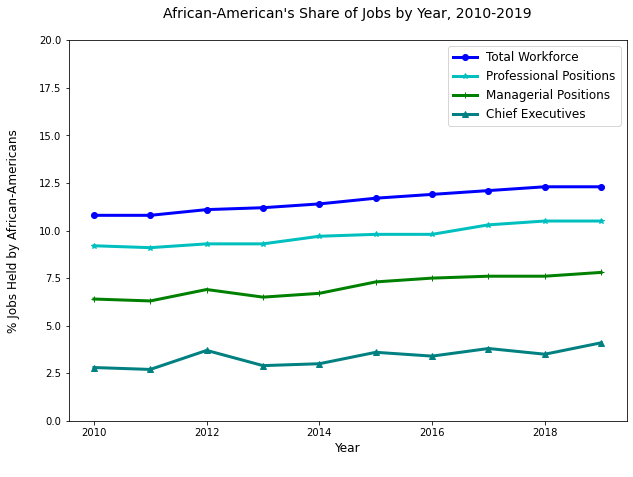

In [29]:
x_axis=x_values
plt.figure(figsize=(10,7))
plt.plot(x_axis, totb_y_values, marker = "o", color="b",linewidth=3,label="Total Workforce")
plt.plot(x_axis,profb_y_values, marker = "*", color="c", linewidth=3,label = "Professional Positions")
plt.plot(x_axis,mgrb_y_values, marker = "+", color="g", linewidth=3,label = "Managerial Positions")
plt.plot(x_axis,ceob_y_values, marker = "^", color="teal", linewidth=3,label = "Chief Executives")
plt.ylim(0,20)
plt.legend(loc="best",fontsize=12)
plt.title("African-American's Share of Jobs by Year, 2010-2019\n",fontsize=14)
plt.xlabel("Year\n",fontsize=12)
plt.ylabel("% Jobs Held by African-Americans\n",fontsize=12)
plt.savefig("Images/AArep.png")
plt.show()


In [30]:
#ASIANS IN WORKFORCE
x_values = np.array([2010, 2011,2012,2013,2014,2015,2016,2017,2018,2019])
tota_y_values = asian_df['Total, 16 years and over']
(aslope, aintercept, arvalue, apvalue, astderr) = linregress(x_values, tota_y_values)                                                
aline_eq = "y = " + str(round(aslope,2)) + "x + " + str(round(aintercept,2))
asian_tot2030 = round((aslope*2030+aintercept),1)
print('ForAsians in Total Workforce')
print(f"slope: {aslope}, intercept: {aintercept}, rvalue: {arvalue}")
print(f"Line equation: {aline_eq}")
print(f"Rsquared value: {arvalue**2}")
print(f"Predicted share of workforce held by Asians in 2030: {asian_tot2030}")

#ASIAN CEOS
ceoa_y_values = asian_df['Chief Executives']
(aslope, aintercept, arvalue, apvalue, astderr) = linregress(x_values, ceoa_y_values)                                                
aline_eq = "y = " + str(round(aslope,2)) + "x + " + str(round(aintercept,2))
asian_ceo2030 = round((aslope*2030+aintercept),1)
print('For Asians in CEO jobs')
print(f"slope: {aslope}, intercept: {aintercept}, rvalue: {arvalue}")
print(f"Line equation: {aline_eq}")
print(f"Rsquared value: {arvalue**2}")
print(f"Predicted share of ceo jobs held by Asians in 2030: {asian_ceo2030}")

#ASIAN MGRS
mgra_y_values = asian_df['Management Occupations']
(aslope, aintercept, arvalue, apvalue, astderr) = linregress(x_values, mgra_y_values)                                                
aline_eq = "y = " + str(round(aslope,2)) + "x + " + str(round(aintercept,2))
asian_mgrs2030 = round((aslope*2030+aintercept),1)
print('For Asians in managerial jobs')
print(f"slope: {aslope}, intercept: {aintercept}, rvalue: {arvalue}")
print(f"Line equation: {aline_eq}")
print(f"Rsquared value: {arvalue**2}")
print(f"Predicted share of managerial jobs held by Asians in 2030: {asian_mgrs2030}")

#ASIAN PROF
profa_y_values = asian_df['Professional Occupations']
(aslope, aintercept, arvalue, apvalue, astderr) = linregress(x_values, profa_y_values)                                                
aline_eq = "y = " + str(round(aslope,2)) + "x + " + str(round(aintercept,2))
asian_profs2030 = round((aslope*2030+aintercept),1)
print('For Asians in Professional jobs')
print(f"slope: {aslope}, intercept: {aintercept}, rvalue: {arvalue}")
print(f"Line equation: {aline_eq}")
print(f"Rsquared value: {arvalue**2}")
print(f"Predicted share of professional jobs held by Asians in 2030: {asian_profs2030}")

ForAsians in Total Workforce
slope: 0.18424241326072, intercept: -365.41634150418366, rvalue: 0.9753213391985539
Line equation: y = 0.18x + -365.42
Rsquared value: 0.9512517146960606
Predicted share of workforce held by Asians in 2030: 8.6
For Asians in CEO jobs
slope: 0.29878789005857526, intercept: -597.218204537305, rvalue: 0.8691803787466451
Line equation: y = 0.3x + -597.22
Rsquared value: 0.7554745307981614
Predicted share of ceo jobs held by Asians in 2030: 9.3
For Asians in managerial jobs
slope: 0.18606060490463722, intercept: -369.3690885803917, rvalue: 0.9410583440048976
Line equation: y = 0.19x + -369.37
Rsquared value: 0.8855908068212403
Predicted share of managerial jobs held by Asians in 2030: 8.3
For Asians in Professional jobs
slope: 0.34484848253654715, intercept: -686.1672679554333, rvalue: 0.9759231134595301
Line equation: y = 0.34x + -686.17
Rsquared value: 0.9524259233845428
Predicted share of professional jobs held by Asians in 2030: 13.9


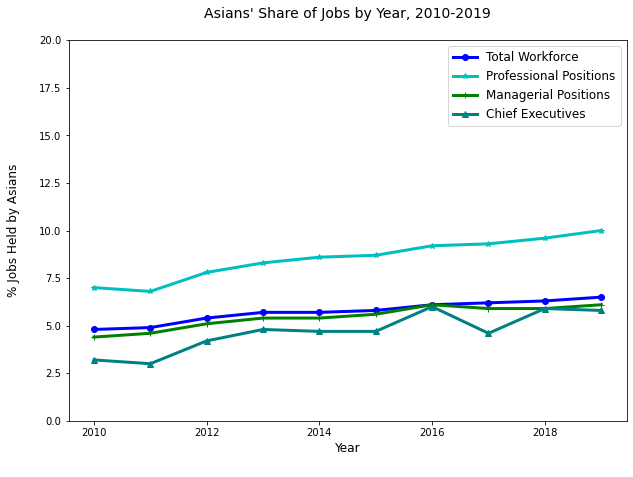

In [31]:
x_axis=x_values

plt.figure(figsize=(10,7))
plt.plot(x_axis, tota_y_values, marker = "o", color="b",linewidth=3,label="Total Workforce")
plt.plot(x_axis,profa_y_values, marker = "*", color="c", linewidth=3,label = "Professional Positions")
plt.plot(x_axis,mgra_y_values, marker = "+", color="g", linewidth=3,label = "Managerial Positions")
plt.plot(x_axis,ceoa_y_values, marker = "^", color="teal", linewidth=3,label = "Chief Executives")
plt.ylim(0,20)
plt.legend(loc="best",fontsize=12)
plt.title("Asians' Share of Jobs by Year, 2010-2019\n",fontsize=14)
plt.xlabel("Year\n",fontsize=12)
plt.ylabel("% Jobs Held by Asians\n",fontsize=12)
plt.savefig("Images/asianrep.png")
plt.show()

In [32]:
#LATINX IN WORKFORCE
x_values = np.array([2010, 2011,2012,2013,2014,2015,2016,2017,2018,2019])
plt.figure(figsize=(10,7))
totl_y_values = latinx_df['Total, 16 years and over']
(lslope, lintercept, lrvalue, lpvalue, lstderr) = linregress(x_values, totl_y_values)                                                
lline_eq = "y = " + str(round(lslope,2)) + "x + " + str(round(lintercept,2))
lat_tot2030 = round((lslope*2030+lintercept),1)
print('For Latinx in Total Workforce')
print(f'slope: {lslope}, intercept: {lintercept}, rvalue: {lrvalue}')
print(f"Line equation: {lline_eq}")
print(f"Rsquared value: {lrvalue**2}")
print(f"Predicted share of workforce held by Latinx in 2030: {lat_tot2030}")

#LATINX CEOS
ceol_y_values = latinx_df['Chief Executives']
(lslope, lintercept, lrvalue, lpvalue, lstderr) = linregress(x_values, ceol_y_values)                                                
lline_eq = "y = " + str(round(lslope,2)) + "x + " + str(round(lintercept,2))
lat_ceo2030 = round((lslope*2030+lintercept),1)
print('For Latinx in CEO jobs')
print(f'slope: {lslope}, intercept: {lintercept}, rvalue: {lrvalue}')
print(f"Line equation: {lline_eq}")
print(f"Rsquared value: {lrvalue**2}")
print(f"Predicted share of ceo jobs held by Latinx in 2030: {lat_ceo2030}")

#LATINX MGRS
mgrl_y_values = latinx_df['Management Occupations']
(lslope, lintercept, lrvalue, lpvalue, lstderr) = linregress(x_values, mgrl_y_values)                                                
lline_eq = "y = " + str(round(lslope,2)) + "x + " + str(round(lintercept,2))
lat_mgr2030 = round((lslope*2030+lintercept),1)
print('For Latinx in Managerial jobs')
print(f'slope: {lslope}, intercept: {lintercept}, rvalue: {lrvalue}')
print(f"Line equation: {lline_eq}")
print(f"Rsquared value: {lrvalue**2}")
print(f"Predicted share of manager jobs held by Latinx in 2030: {lat_mgr2030}")

#lATINX PROF
profl_y_values = latinx_df['Professional Occupations']
(lslope, lintercept, lrvalue, lpvalue, lstderr) = linregress(x_values, profl_y_values)                                                
lline_eq = "y = " + str(round(lslope,2)) + "x + " + str(round(lintercept,2))
lat_prof2030 = round((lslope*2030+lintercept),1)
print('For Latinx in Professional jobs')
print(f'slope: {lslope}, intercept: {lintercept}, rvalue: {lrvalue}')
print(f"Line equation: {lline_eq}")
print(f"Rsquared value: {lrvalue**2}")
print(f"Predicted share of professional jobs held by Latinx in 2030: {lat_prof2030}")

For Latinx in Total Workforce
slope: 0.3660605864091353, intercept: -721.3490513021295, rvalue: 0.9884017320772893
Line equation: y = 0.37x + -721.35
Rsquared value: 0.9769379839733856
Predicted share of workforce held by Latinx in 2030: 21.8
For Latinx in CEO jobs
slope: 0.18969694484363903, intercept: -377.074495454268, rvalue: 0.7847273119942245
Line equation: y = 0.19x + -377.07
Rsquared value: 0.615796954189681
Predicted share of ceo jobs held by Latinx in 2030: 8.0
For Latinx in Managerial jobs
slope: 0.34181816505663326, intercept: -679.3726935733449, rvalue: 0.9742283926662373
Line equation: y = 0.34x + -679.37
Rsquared value: 0.9491209610770402
Predicted share of manager jobs held by Latinx in 2030: 14.5
For Latinx in Professional jobs
slope: 0.295151525555235, intercept: -585.972748192874, rvalue: 0.9862321581842086
Line equation: y = 0.3x + -585.97
Rsquared value: 0.9726538698366819
Predicted share of professional jobs held by Latinx in 2030: 13.2


<Figure size 720x504 with 0 Axes>

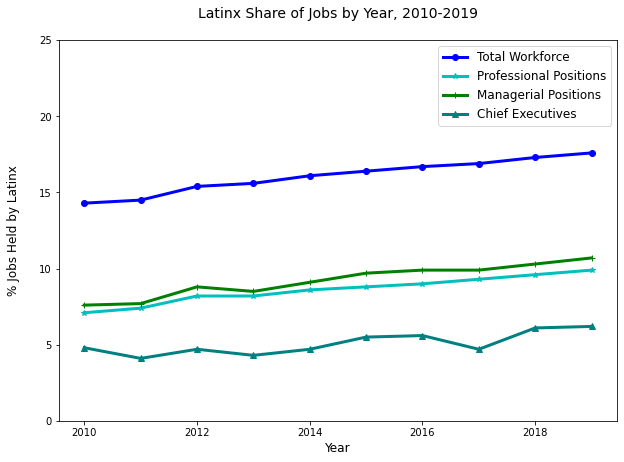

In [33]:
x_axis=x_values
plt.figure(figsize=(10,7))
plt.plot(x_axis, totl_y_values, marker = "o", color="b",linewidth=3,label="Total Workforce")
plt.plot(x_axis,profl_y_values, marker = "*", color="c", linewidth=3,label = "Professional Positions")
plt.plot(x_axis,mgrl_y_values, marker = "+", color="g", linewidth=3,label = "Managerial Positions")
plt.plot(x_axis,ceol_y_values, marker = "^", color="teal", linewidth=3,label = "Chief Executives")
plt.ylim(0,25)
plt.legend(loc="best",fontsize=12)
plt.title("Latinx Share of Jobs by Year, 2010-2019\n",fontsize=14)
plt.xlabel("Year",fontsize=12)
plt.ylabel("% Jobs Held by Latinx\n",fontsize=12)
plt.savefig("Images/latrep.png")
plt.show()

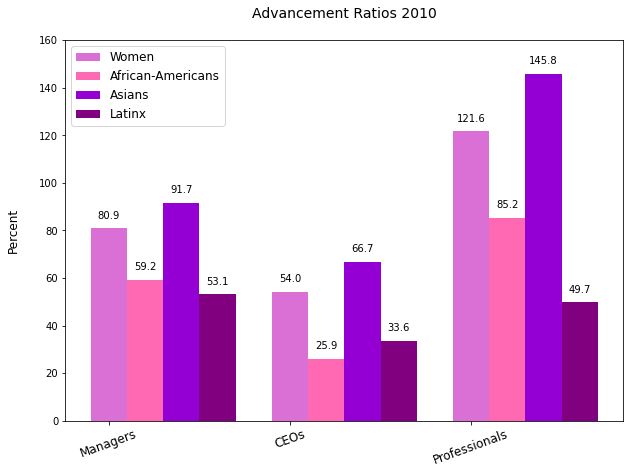

In [34]:
advratio_2010 = pd.read_csv("DataFiles/advancement_ratio_2010.csv")
advratio_2010.set_index("Unnamed: 0", inplace=True)
advratio_2010.head()

# advratio_2019 = pd.read_csv("DataFiles/advancement_ratio_2019.csv")
# advratio_2019.set_index("Unnamed: 0", inplace=True)

# 2010

# data = [[advratio_2010.loc["women"]],[advratio_2010.loc["black"]],[advratio_2010.loc["asian"]],
#         [advratio_2010.loc["hispanic"]]]

data = [[80.9,54.0,121.6],[59.2,25.9,85.2],[91.7,66.7,145.8],[53.1,33.6,49.7]]
demographics = ["Women","African-Americans","Asians","Latinx"]

X = np.arange(3)
plt.figure(figsize=(10,7))
tick_locations = [value for value in X]
plt.xticks(tick_locations, ["Managers","CEOs","Professionals"],fontsize=12)
plt.bar(X + 0.00, data[0], color = 'orchid', width = 0.2, align="center")
for x,y in zip(X + 0.00,data[0]):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')

plt.bar(X + 0.20, data[1], color = 'hotpink', width = 0.2,align="center")
for x,y in zip(X + 0.20,data[1]):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')

plt.bar(X + 0.40, data[2], color = 'darkviolet', width = 0.2,align="center")
for x,y in zip(X + 0.40,data[2]):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')
    
plt.bar(X + 0.60, data[3], color = 'purple', width = 0.2,align="center")
for x,y in zip(X + 0.60,data[3]):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')
    
plt.title("Advancement Ratios 2010\n",fontsize=14)
plt.legend(demographics, loc="best",fontsize=12)
plt.ylabel("Percent\n",fontsize=12)
plt.xticks(rotation = 20)
plt.ylim(0,160)

plt.savefig("Images/bar_advratio2010")
plt.show()


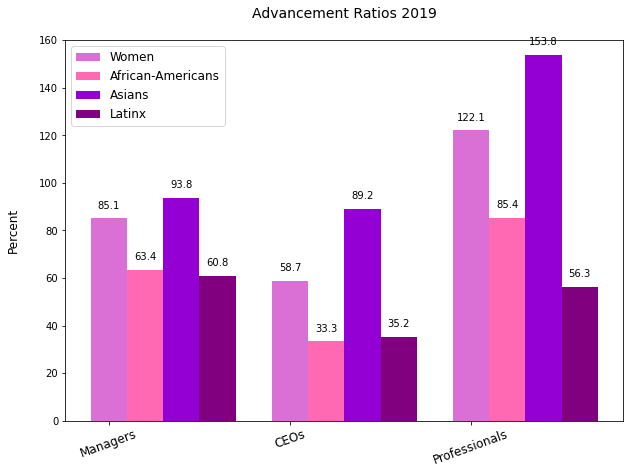

In [35]:
# advancement ratio chart, 2019

# advratio_2019 = pd.read_csv("DataFiles/advancement_ratio_2019.csv")
# advratio_2019.set_index("Unnamed: 0", inplace=True)

data = [[85.1,58.7,122.1],[63.4,33.3,85.4],[93.8,89.2,153.8],[60.8,35.2,56.3]]
demographics = ["Women","African-Americans","Asians","Latinx"]
# data0 = [[advratio_2019.loc["women"]]]
# data1=[[advratio_2019.loc["black"]]]
# data2=[[advratio_2019.loc["asian"]]]
# data3=[[advratio_2019.loc["hispanic"]]]

X = np.arange(3)
plt.figure(figsize=(10,7))
tick_locations = [value for value in X]
plt.xticks(tick_locations, ["Managers","CEOs","Professionals"],fontsize=12)
plt.bar(X + 0.00, data[0], color = 'orchid', width = 0.2, align="center")
for x,y in zip(X + 0.00,data[0]):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')

plt.bar(X + 0.20, data[1], color = 'hotpink', width = 0.2,align="center")
for x,y in zip(X + 0.20,data[1]):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')

plt.bar(X + 0.40, data[2], color = 'darkviolet', width = 0.2,align="center")
for x,y in zip(X + 0.40,data[2]):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')
    
plt.bar(X + 0.60, data[3], color = 'purple', width = 0.2,align="center")
for x,y in zip(X + 0.60,data[3]):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')
    
plt.title("Advancement Ratios 2019\n",fontsize=14)
plt.legend(demographics, loc="best",fontsize=12)
plt.ylabel("Percent\n",fontsize=12)
plt.xticks(rotation = 20)
plt.ylim(0,160)

plt.savefig("Images/bar_advratio2019")
plt.show()


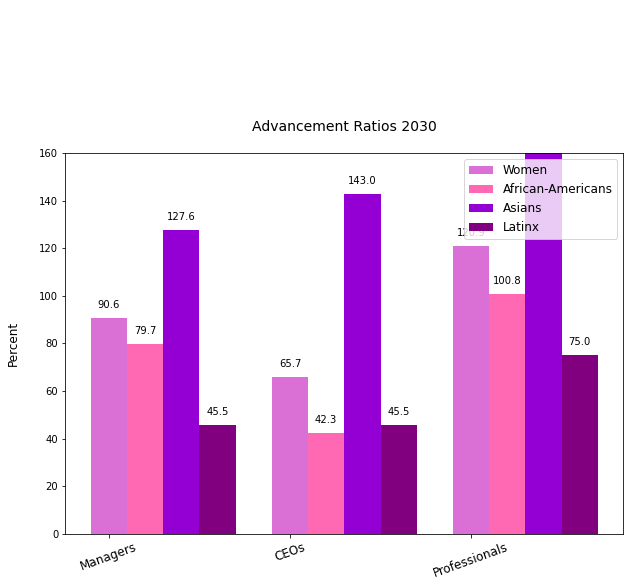

In [37]:
# advancement ratio chart, 2030

advratio_2030 = pd.read_csv("DataFiles/advratio2030.csv")
advratio_2030.head()
advratio_2030.set_index("Unnamed: 0", inplace=True)

# data0 = [[advratio_2030.loc["Women"]]]
# data1=[[advratio_2030.loc["African-Americans"]]]
# data2=[[advratio_2030.loc["Asians"]]]
# data3=[[advratio_2030.loc["Latinx"]]]
# print(data2)
# print(data3)
# type(data0)

data = [[90.6,65.7,120.9],[79.7, 42.3, 100.8],[127.6,143.0,213.8],[45.5,45.5,75.0]]
demographics = ["Women","African-Americans","Asians","Latinx"]
X = np.arange(3)
plt.figure(figsize=(10,7))
tick_locations = [value for value in X]
plt.xticks(tick_locations, ["Managers","CEOs","Professionals"],fontsize=12)
plt.bar(X + 0.00, data[0], color = 'orchid', width = 0.2, align="center")
for x,y in zip(X + 0.00,data[0]):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')

plt.bar(X + 0.20, data[1], color = 'hotpink', width = 0.2,align="center")
for x,y in zip(X + 0.20,data[1]):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')

plt.bar(X + 0.40, data[2], color = 'darkviolet', width = 0.2,align="center")
for x,y in zip(X + 0.40,data[2]):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')
    
plt.bar(X + 0.60, data[3], color = 'purple', width = 0.2,align="center")
for x,y in zip(X + 0.60,data[3]):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')
    
plt.title("Advancement Ratios 2030\n",fontsize=14)
plt.legend(demographics, loc="best",fontsize=12)
plt.ylabel("Percent\n",fontsize=12)
plt.xticks(rotation = 20)
plt.ylim(0,160)

plt.savefig("Images/bar_advratio2030")
plt.show()


In [38]:
skinny_data2019b = skinny_data2019.drop([1],axis=0)
skinny_data2019b

df2030 = pd.DataFrame() 
df2030['Population'] = ['Women','African-Americans','Asians','Latinx']
df2030['Total Workforce 2019'] = [47,12.3,6.5,17.6]
df2030['Total Workforce 2030'] = [wom_tot2030, aa_tot2030,asian_tot2030,lat_tot2030]
df2030['Managers 2019'] = [40,7.8,6.1,10.7]
df2030['Managers 2030'] = [wom_mgrs2030,aa_mgrs2030,asian_mgrs2030,lat_mgr2030]
df2030['CEOs 2019'] = [27.6,4.1,5.8,6.2]
df2030['CEOs 2030'] = [wom_ceos2030,aa_ceos2030,asian_ceo2030,lat_ceo2030]
df2030['Professionals 2019'] = [57.4,10.5,10,9.9]
df2030['Professionals 2030'] = [wom_prof2030,aa_prof2030,asian_profs2030,lat_prof2030]
df2030.to_csv("DataFiles/advratio2030.csv", encoding='utf-8', index=False)



In [39]:
# CHANGE IN REPRESENTATION 2010-2019
job_level = ["Total Workforce","Managers","CEOs","Professionals"]
demographics = ["Women","African-Americans","Asians","Latinx"]
women_change2019 = [-0.4, 4.7, 8.2, 0.0]
af_am_change2019 = [13.9, 21.9, 46.4, 14.1]
asian_change2019 = [35.4, 38.6, 81.3, 42.9]
latinx_change2019 = [23.1, 40.8, 29.2, 39.4]

# change in ratio between job level share and share of total workforce, 2010 to 2019
job_level2 = ["Managers","CEOs","Professionals"]
demographics = ["Women","African-Americans","Asians","Latinx"]
women_ratiochange2019 = [0,5.2,8.7, 0.43]
af_am_ratiochange2019 = [0,7.0, 28.6,0.2]
asian_ratiochange2019 = [0,2.4,33.8,5.5]
latinx_ratiochange2019 = [0,14.4,4.9,13.3]

# PREDICTED CHANGE 2019-2030	
job_level = ["Total Workforce","Managers","CEOs","Professionals"]
demographics = ["Women","African-Americans","Asians","Latinx"]
women_change2030 = [-0.7, 6.5, 12.0, -1.0]
af_am_change2030 = [18.0, 25.3, 27.3, 18.0]
asian_change2030 = [32.3, 36.6, 60.7, 38.8]
latinx_change2030 = [23.6, 35.7, 29.2, 33.1]

# PREDICTED CHANGE IN RATIO BETWEEN JOB LEVEL SHARE AND SHARE OF TOTAL WORKFORCE, 2019-2030
job_level2 = ["Total Workforce","Managers","CEOs","Professionals"]
demographics = ["Women","African-Americans","Asians","Latinx"]
women_ratiochange30 = [7.3,12.8,-0.3]
af_am_ratiochange30 = [6.2,7.9,0]
asian_ratiochange30 = [3.2,21.5,4.9]
latinx_ratiochange30 = [9.8,4.5,7.7]



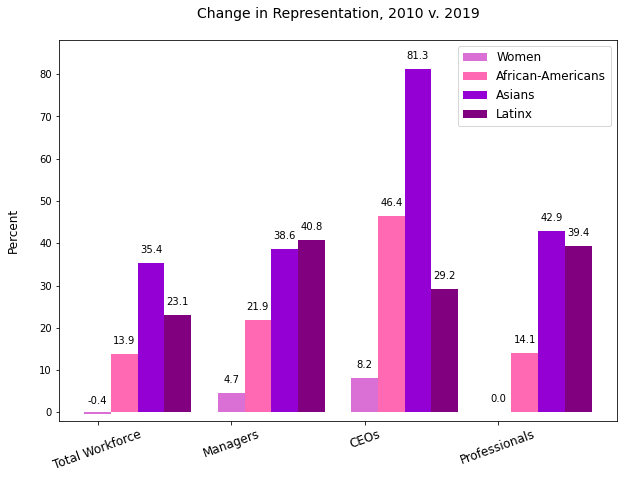

In [40]:
# Bar charts to illustrate difference between representation in 2010, 2019, and 2030, both as delta in representation
# and as delta in ratio to total workforce


job_level = ["Total Workforce","Managers","CEOs","Professionals"]
demographics = ["Women","African-Americans","Asians","Latinx"]
# women_change2019 = [-0.4, 4.7, 8.2, 0.0]
# af_am_change2019 = [13.9, 21.9, 46.4, 14.1]
# asian_change2019 = [35.4, 38.6, 81.3, 42.9]
# latinx_change2019 = [23.1, 40.8, 29.2, 39.4]
data =[[-0.4, 4.7, 8.2, 0.0],[13.9, 21.9, 46.4, 14.1],[35.4, 38.6, 81.3, 42.9],[23.1, 40.8, 29.2, 39.4]]

X = np.arange(4)
plt.figure(figsize=(10,7))
tick_locations = [value for value in X]
plt.xticks(tick_locations, ["Total Workforce","Managers","CEOs","Professionals"],fontsize=12)
plt.bar(X + 0.00, data[0], color = 'orchid', width = 0.2, align="center")
for x,y in zip(X + 0.00,data[0]):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')

plt.bar(X + 0.20, data[1], color = 'hotpink', width = 0.2,align="center")
for x,y in zip(X + 0.20,data[1]):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')

plt.bar(X + 0.40, data[2], color = 'darkviolet', width = 0.2,align="center")
for x,y in zip(X + 0.40,data[2]):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')
    
plt.bar(X + 0.60, data[3], color = 'purple', width = 0.2,align="center")
for x,y in zip(X + 0.60,data[3]):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')

plt.title("Change in Representation, 2010 v. 2019\n",fontsize=14)
plt.legend(demographics, loc="best",fontsize=12)
plt.ylabel("Percent\n",fontsize=12)
plt.xticks(rotation = 20)
plt.ylim(-2,88)

plt.savefig("Images/bar_change_2019")
plt.show()


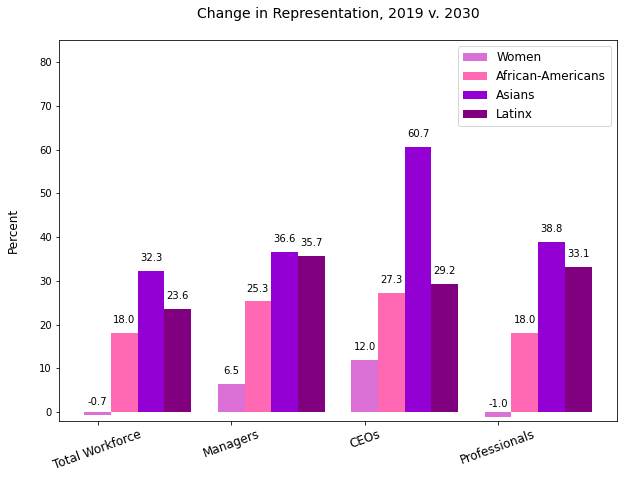

In [41]:
data2030 = [[-0.7, 6.5, 12.0, -1.0],[18.0, 25.3, 27.3, 18.0],[32.3, 36.6, 60.7, 38.8],[23.6, 35.7, 29.2, 33.1]]
demographics = ["Women","African-Americans","Asians","Latinx"]
# women_change2030 = [-0.7, 6.5, 12.0, -1.0]
# af_am_change2030 = [18.0, 25.3, 27.3, 18.0]
# asian_change2030 = [32.3, 36.6, 60.7, 38.8]
# latinx_change2030 = [23.6, 35.7, 29.2, 33.1]

X = np.arange(4)
plt.figure(figsize=(10,7))
tick_locations = [value for value in X]
plt.xticks(tick_locations, ["Total Workforce","Managers","CEOs","Professionals"],fontsize=12)
plt.bar(X + 0.00, data2030[0], color = 'orchid', width = 0.2, align="center")
for x,y in zip(X + 0.00,data2030[0]):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')

plt.bar(X + 0.20, data2030[1], color = 'hotpink', width = 0.2,align="center")
for x,y in zip(X + 0.20,data2030[1]):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')

plt.bar(X + 0.40, data2030[2], color = 'darkviolet', width = 0.2,align="center")
for x,y in zip(X + 0.40,data2030[2]):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')

plt.bar(X + 0.60, data2030[3], color = 'purple', width = 0.2,align="center")
for x,y in zip(X + 0.60,data2030[3]):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')

plt.title("Change in Representation, 2019 v. 2030\n",fontsize=14)
plt.legend(demographics, loc="best",fontsize=12)
plt.ylabel("Percent\n",fontsize=12)
plt.xticks(rotation = 20)
plt.ylim(-2,85)
plt.savefig("Images/bar_change_2030")
plt.show()


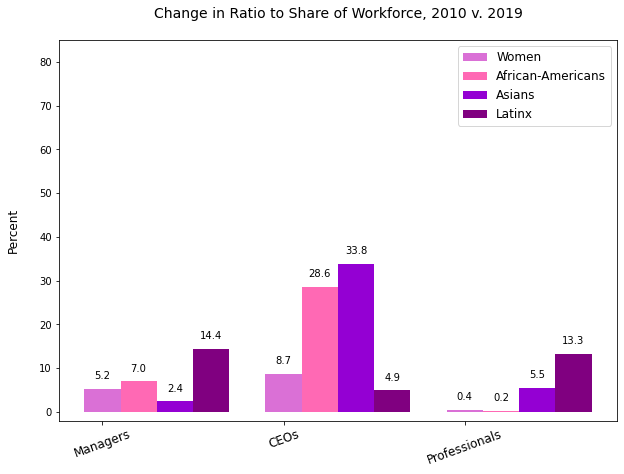

In [42]:
dataratio2019 = [[5.2,8.7, 0.43],[7.0, 28.6,0.2],[2.4,33.8,5.5],[14.4,4.9,13.3]]
demographics = ["Women","African-Americans","Asians","Latinx"]

X = np.arange(3)
plt.figure(figsize=(10,7))
tick_locations = [value for value in X]
plt.xticks(tick_locations, ["Managers","CEOs","Professionals"],fontsize=12)
plt.bar(X + 0.00, dataratio2019[0], color = 'orchid', width = 0.2, align="center")
for x,y in zip(X + 0.00,dataratio2019[0]):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')
    
plt.bar(X + 0.20, dataratio2019[1], color = 'hotpink', width = 0.2,align="center")
for x,y in zip(X + 0.20,dataratio2019[1]):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')
    
plt.bar(X + 0.40, dataratio2019[2], color = 'darkviolet', width = 0.2,align="center")
for x,y in zip(X + 0.4,dataratio2019[2]):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')
    
plt.bar(X + 0.60, dataratio2019[3], color = 'purple', width = 0.2,align="center")
for x,y in zip(X + 0.6,dataratio2019[3]):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')
    
plt.title("Change in Ratio to Share of Workforce, 2010 v. 2019\n",fontsize=14)
plt.legend(demographics, loc="best",fontsize=12)
plt.ylabel("Percent\n",fontsize=12)
plt.xticks(rotation = 20)
plt.ylim(-2,85)
plt.savefig("Images/bar_ratiochange_2019")
plt.show()

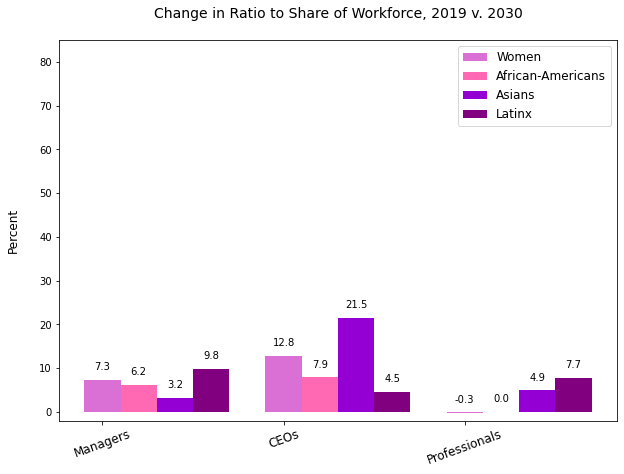

In [43]:
dataratio2030 = [[7.3,12.8,-0.3], [6.2,7.9,0],[3.2,21.5,4.9],[9.8,4.5,7.7]]
demographics = ["Women","African-Americans","Asians","Latinx"]

X = np.arange(3)
plt.figure(figsize=(10,7))
tick_locations = [value for value in X]
plt.xticks(tick_locations, ["Managers","CEOs","Professionals"],fontsize=12)
plt.bar(X + 0.00, dataratio2030[0], color = 'orchid', width = 0.2, align="center")
for x,y in zip(X + 0.00,dataratio2030[0]):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')
plt.bar(X + 0.20, dataratio2030[1], color = 'hotpink', width = 0.2,align="center")
for x,y in zip(X + 0.20,dataratio2030[1]):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')
plt.bar(X + 0.40, dataratio2030[2], color = 'darkviolet', width = 0.2,align="center")
for x,y in zip(X + 0.4,dataratio2030[2]):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')
plt.bar(X + 0.60, dataratio2030[3], color = 'purple', width = 0.2,align="center")
for x,y in zip(X + 0.6,dataratio2030[3]):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')
plt.title("Change in Ratio to Share of Workforce, 2019 v. 2030\n",fontsize=14)
plt.legend(demographics, loc="best",fontsize=12)
plt.ylabel("Percent\n",fontsize=12)
plt.xticks(rotation = 20)
plt.ylim(-2,85)
plt.savefig("Images/bar_ratiochange_2030")
plt.show()

In [44]:
# To predict the years when each population will reach parity in each job category with their share of total workforce,
# find where the line for rep in total workforce crosses with line for rep in job category (i.e, where y1 = y2 and x1= x2):

# SOMETHING'S WRONG HERE--BUT WHAT? (SEE OUTPUT VALUES BELOW)
# wom tot line: y = -0.02x + 83.57
# af am tot line: y = 0.19x + -371.81
# asian tot line: y = 0.18x + -365.42
# latinx tot line: y = 0.37x + -721.35
 
# wommgr_parity = int((-434.72-83.57)/(0.02-0.24))
# womceo_parity = int((83.57+509.19)/.25)
# bceo_parity = int((371.81-239.61)/.07)
# bmgr_parity = int((344.56-371.81)/.02)
# bprof_parity = int((333.33-371.81)/-.02)
# aceo_parity = int((597.22-365.42)/.12)
# amgr_parity = int((369.37-365.42)/.01)
# lceo_parity = int((721.35-377.07)/.18)
# lmgr_parity = int((721.35-679.37) /.03)
# lprof_parity = int((721.35-585.97)/.34)      

# asian_ceo1931 = round((aslope*1931+aintercept),1)

# print(f"wom ceo {womceo_parity}")
# print(f"wom manager {wommgr_parity}")
# print(f"Af-am ceo {bceo_parity}")
# print(f"Af-am mgr {bmgr_parity}")
# print(f"Af-am prof {bprof_parity}")
# print(f"Asian ceo {aceo_parity}")
# print(f"asian mgrs {amgr_parity}")
# print(f"asian_ceo percent 1931 {asian_ceo1931}")
# print(f"latin ceo {lceo_parity}")
# print(f"latin mgr {lmgr_parity}")
# print(f"latin prof {lprof_parity}")

In [45]:
# parity_data = [[wommgr_parity,womceo_parity,0], [bmgr_parity,bceo_parity,bprof_parity],[amgr_parity,aceo_parity,0],
#                [lmgr_parity,lceo_parity,lprof_parity]]
# demographics = ["Women","African-Americans","Asians","Latinx"]

# X = np.arange(3)
# plt.figure(figsize=(10,7))
# tick_locations = [value for value in X]
# plt.xticks(tick_locations, ["Managers","CEOs","Professionals"],fontsize=12)
# plt.bar(X + 0.00, parity_data[0], color = 'orchid', width = 0.2, align="center")
# for x,y in zip(X + 0.00,parity_data[0]):
#     label = y
#     plt.annotate(label, 
#                  (x,y),
#                  textcoords="offset points", 
#                  xytext=(0,10), 
#                  ha='center')
# plt.bar(X + 0.20, parity_data[1], color = 'hotpink', width = 0.2,align="center")
# for x,y in zip(X + 0.20,parity_data[1]):
#     label = y
#     plt.annotate(label, 
#                  (x,y),
#                  textcoords="offset points", 
#                  xytext=(0,10), 
#                  ha='center')
# plt.bar(X + 0.40, parity_data[2], color = 'darkviolet', width = 0.2,align="center")
# for x,y in zip(X + 0.4,parity_data[2]):
#     label = y
#     plt.annotate(label, 
#                  (x,y),
#                  textcoords="offset points", 
#                  xytext=(0,10), 
#                  ha='center')
# plt.bar(X + 0.60, parity_data[3], color = 'purple', width = 0.2,align="center")
# for x,y in zip(X + 0.6,parity_data[3]):
#     label = y
#     plt.annotate(label, 
#                  (x,y),
#                  textcoords="offset points", 
#                  xytext=(0,10), 
#                  ha='center')
# plt.title("When Parity Will Be Reached\n",fontsize=14)
# plt.legend(demographics, loc="best",fontsize=12)
# plt.ylabel("Year\n",fontsize=12)
# plt.xticks(rotation = 20)
# plt.ylim(2020,2130)
# plt.savefig("Images/parity")
# plt.show()